<a href="https://colab.research.google.com/github/zzzzzssyy/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab%203/Lab%203_Benchmarking_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install wbgapi


In [4]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [60]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_chn = df.xs('CHN', axis=1, level=0).copy()

Fetching data...


In [61]:
df_chn.head(10)

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
2000,0.347811,NaN,16.983455,20.681599,33.632683,18.329343,2.825096e+12,2237.442985,36.265233,74.190,706837950.0,3.26
2001,0.719126,NaN,16.565574,20.077687,35.523858,18.004960,3.059936e+12,2405.893967,37.865837,73.878,715928584.0,3.80
2002,-0.731971,NaN,16.223333,22.351823,36.068782,19.842619,3.342778e+12,2610.729603,38.792525,73.563,725938760.0,4.24
2003,1.127603,NaN,15.463135,26.602374,39.428013,24.475106,3.681007e+12,2857.037354,41.731545,73.246,735682023.0,4.58
2004,3.824637,NaN,14.776896,30.609716,41.634374,28.030618,4.053945e+12,3127.862765,44.476216,72.927,744936890.0,4.49
2005,1.776414,8.452438,14.980030,33.368798,40.178087,27.991277,4.518455e+12,3465.817344,45.206956,72.605,754465388.0,4.52
2006,1.649431,8.929483,15.032950,35.526847,39.689700,28.042733,5.091155e+12,3883.354129,46.966282,72.280,761948735.0,4.43
2007,4.816768,9.625737,14.843586,34.906696,40.222088,26.359768,5.811553e+12,4409.757008,48.538094,71.954,766486940.0,4.35
2008,5.925251,9.943414,14.728917,32.092514,41.960725,24.618619,6.373544e+12,4811.474718,49.728908,71.625,769779554.0,4.59


In [62]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chn['Natural_Rate_Unemp'] = df_chn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chn['Productivity'] = df_chn['GDP_Const'] / df_chn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chn['NCO'] = df_chn['Exports_GDP'] - df_chn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chn['Budget_Balance'] = df_chn['Tax_Rev_GDP'] - df_chn['Gov_Exp_GDP']

print("Calculations Complete.")

Calculations Complete.


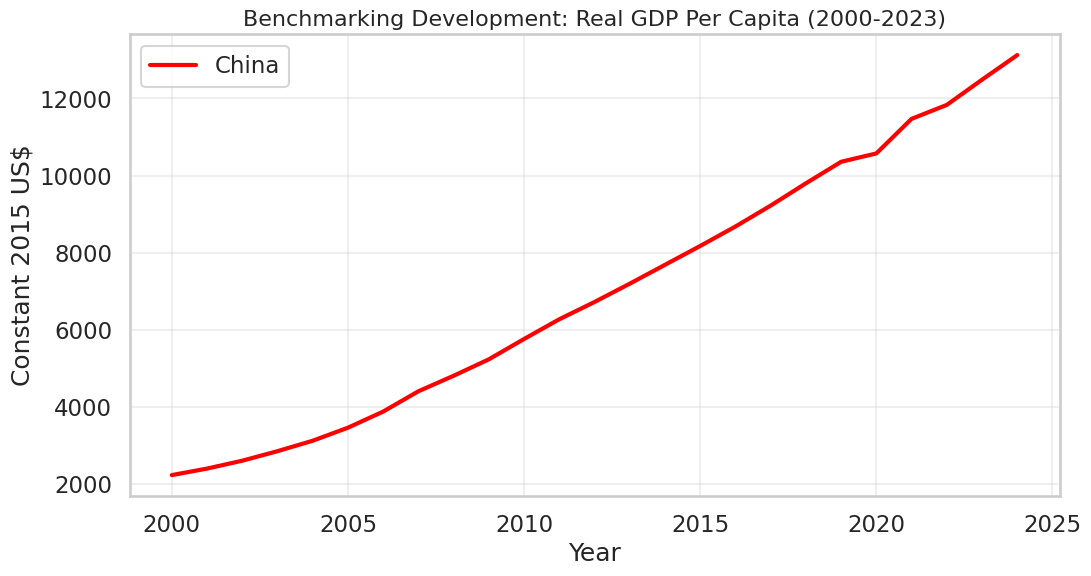

In [63]:
plt.figure(figsize=(12, 6))
# Plot ONLY China
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='red', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

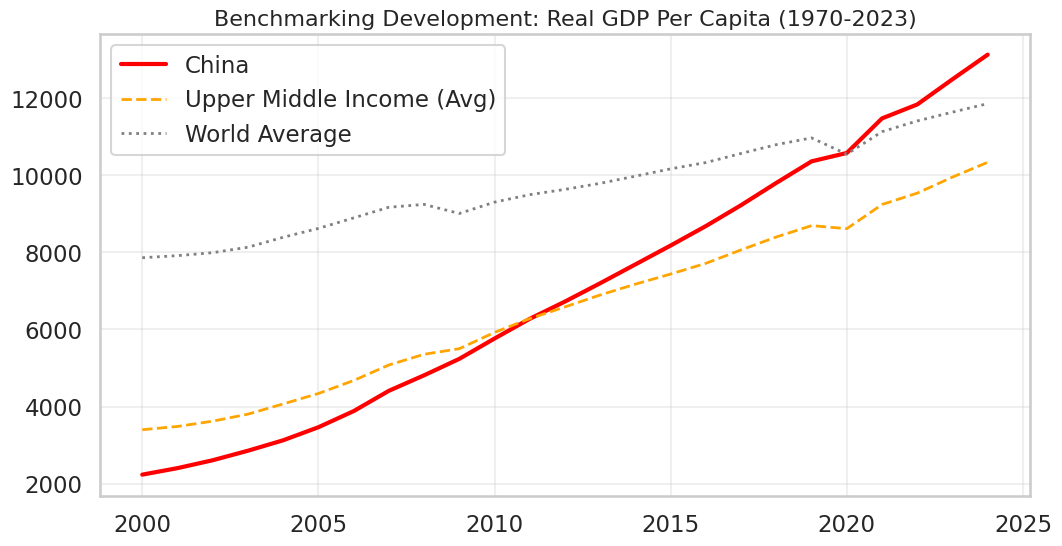

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='red', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (1970-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

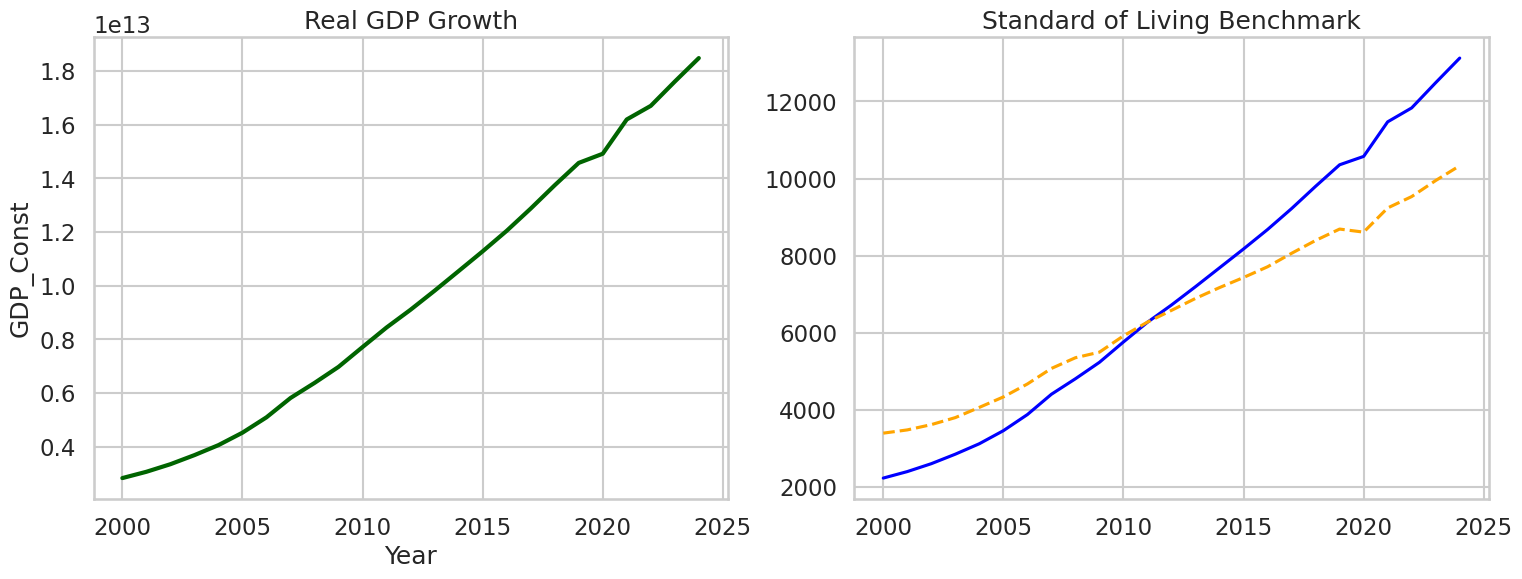

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_chn, x=df_chn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

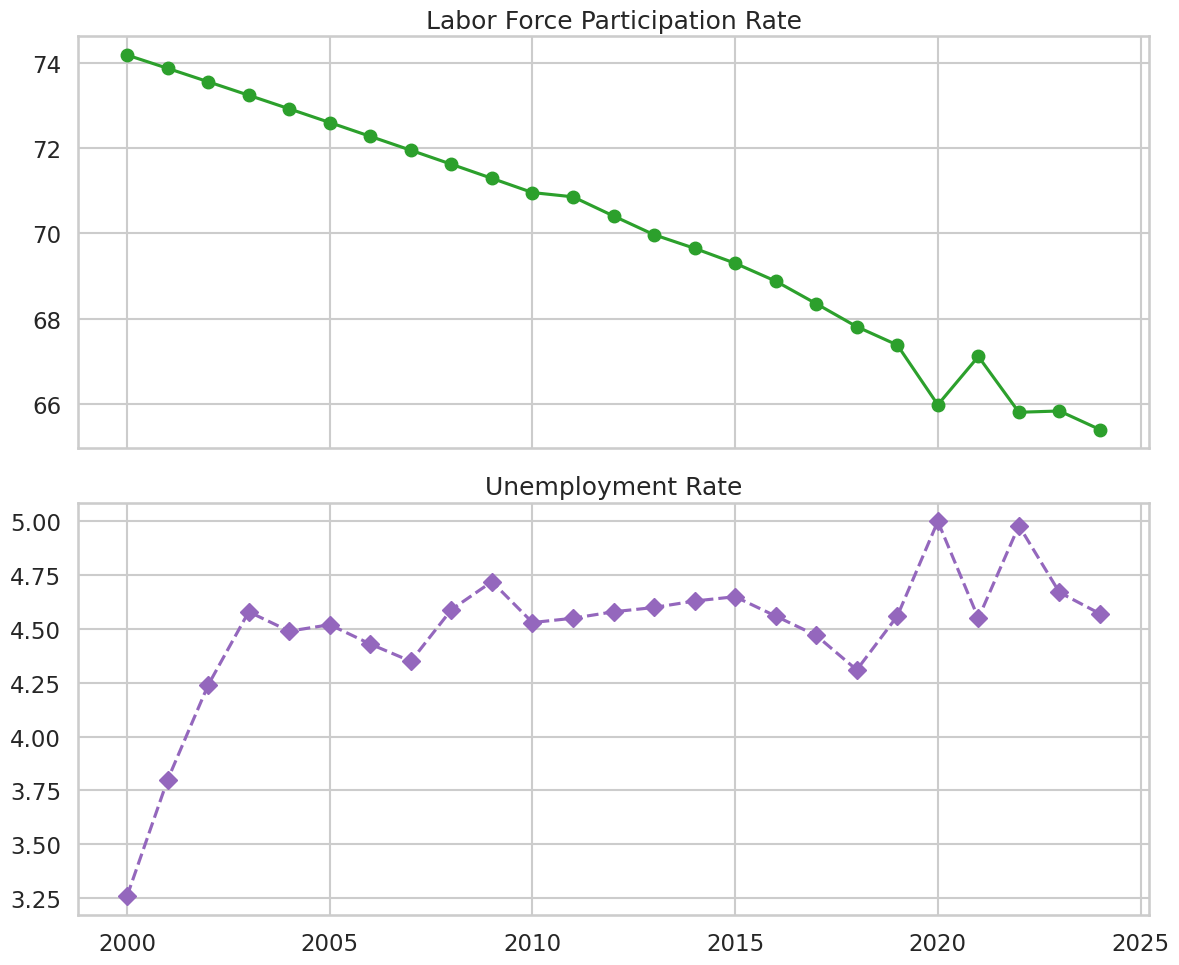

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_chn.index, df_chn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_chn.index, df_chn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

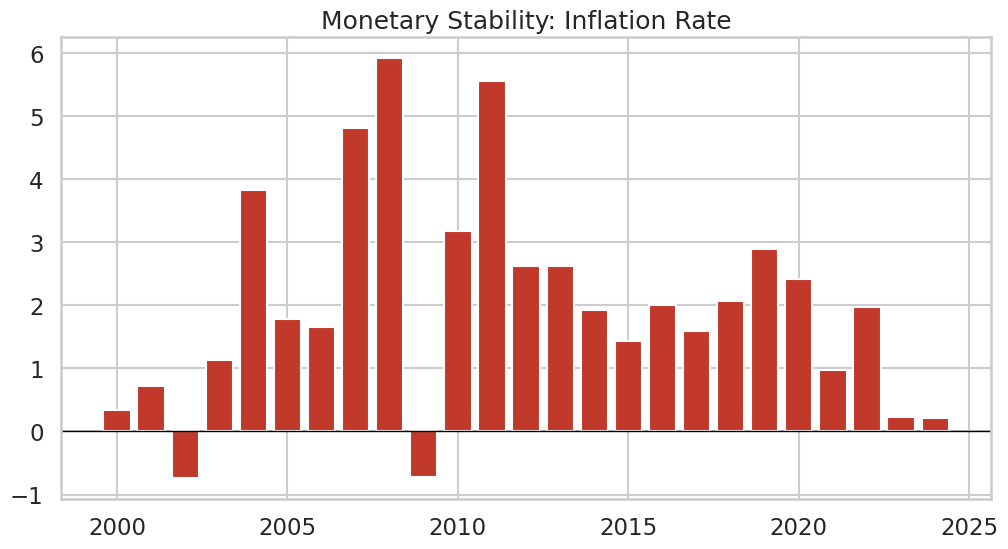

In [67]:
plt.figure(figsize=(12, 6))

plt.bar(df_chn.index, df_chn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

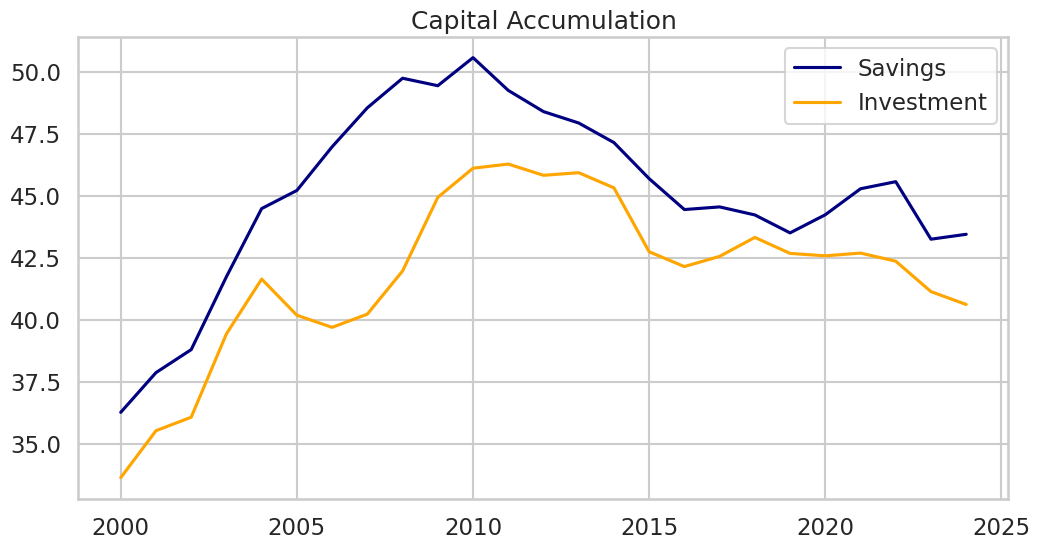

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

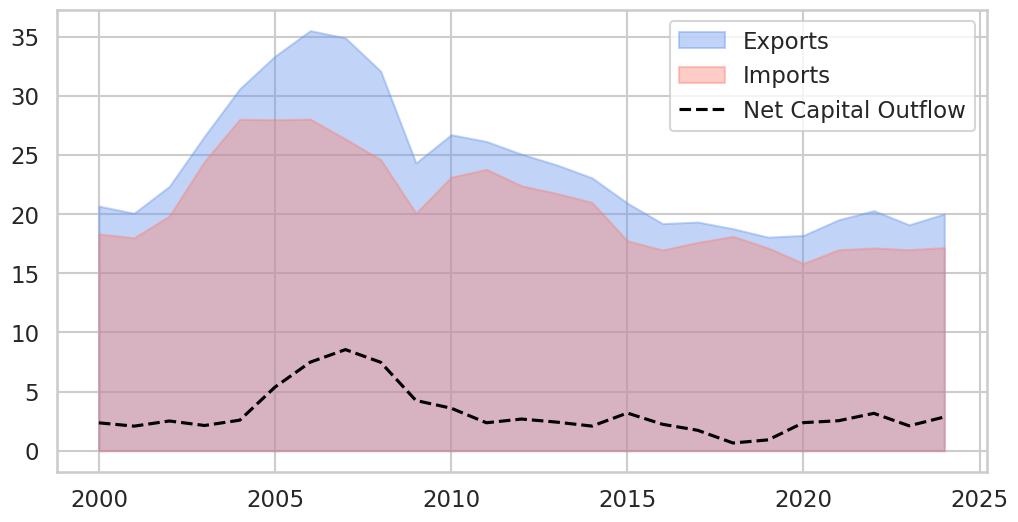

In [69]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

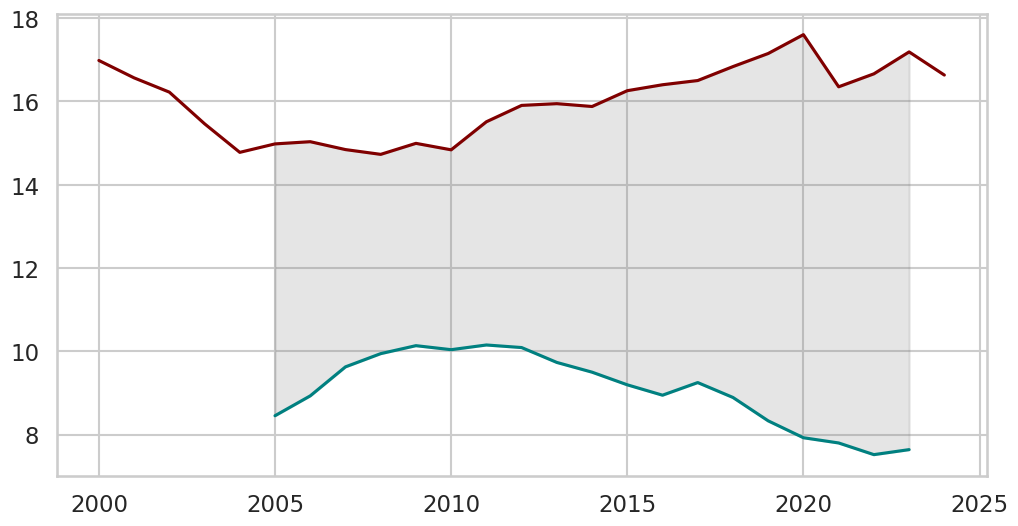

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

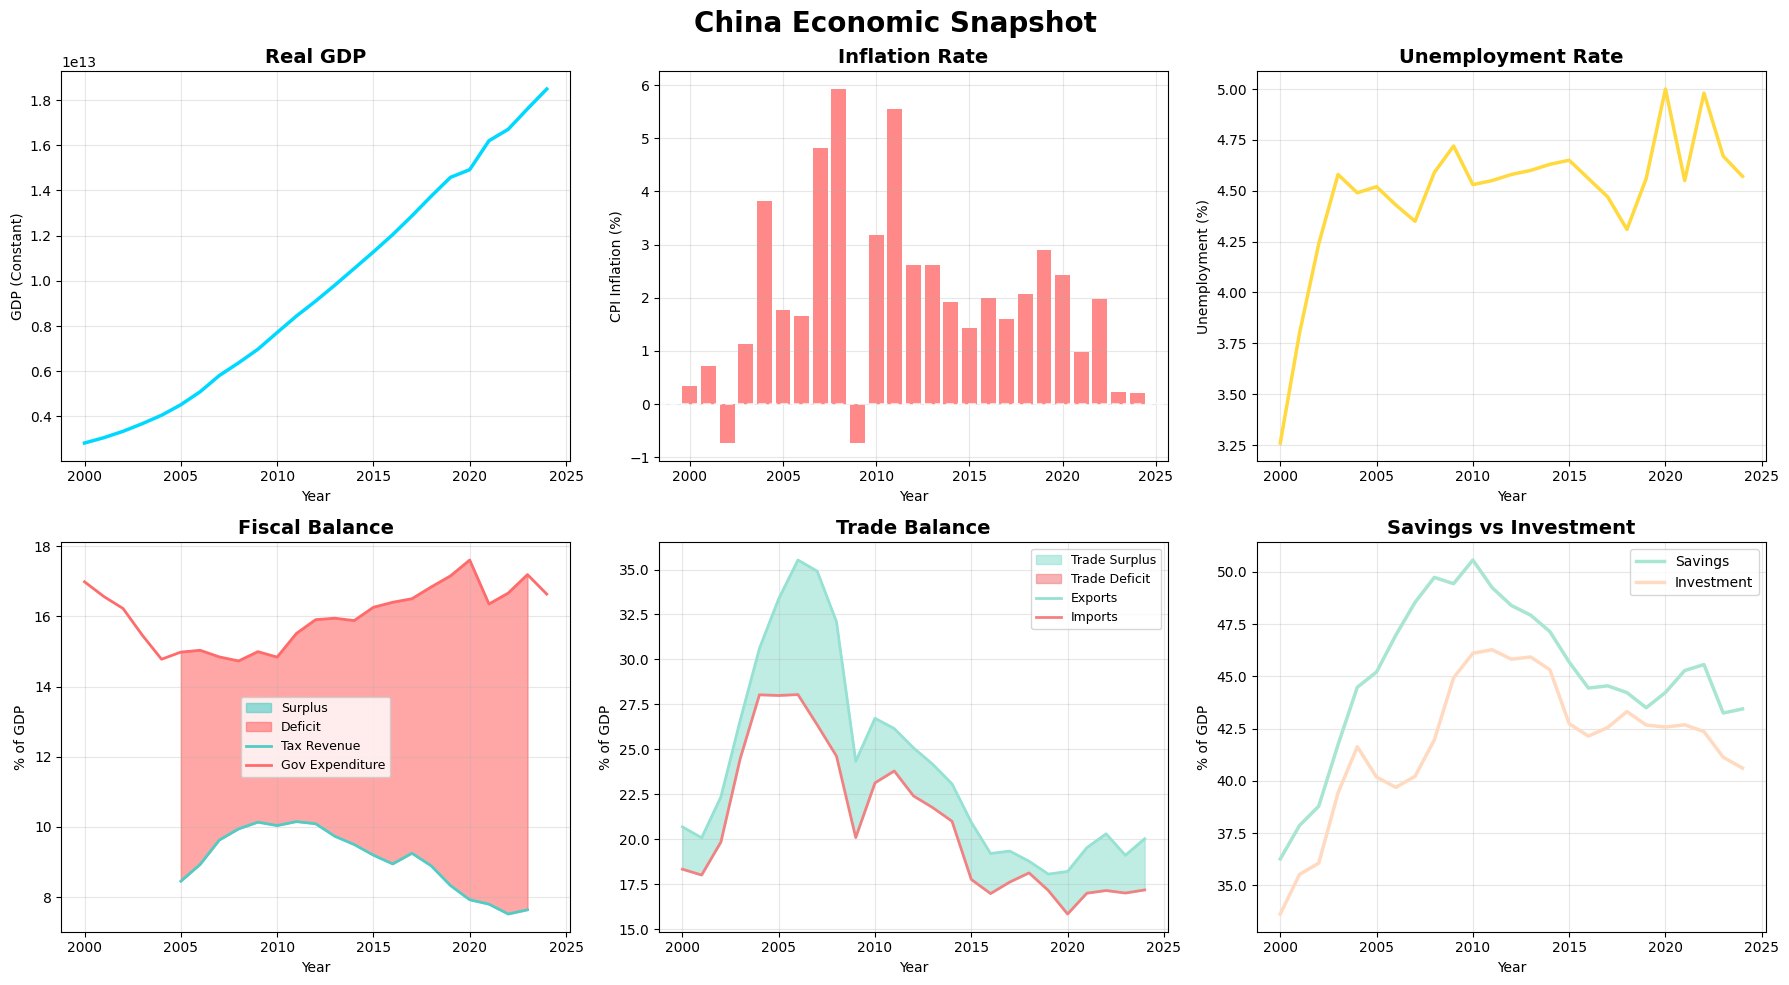

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set white background style
plt.style.use('default')

# Create 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('China Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Top Left: Real GDP (Line chart)
axes[0, 0].plot(df_chn.index, df_chn['GDP_Const'], color='#00D9FF', linewidth=2.5)
axes[0, 0].set_title('Real GDP', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('GDP (Constant)')
axes[0, 0].grid(alpha=0.3)

# Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
axes[0, 1].bar(df_chn.index, df_chn['Inflation_CPI'], color='#FF6B6B', alpha=0.8)
axes[0, 1].axhline(y=0, color='white', linestyle='--', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Inflation Rate', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('CPI Inflation (%)')
axes[0, 1].grid(alpha=0.3)

# Top Right: Unemployment Rate (Line chart)
axes[0, 2].plot(df_chn.index, df_chn['Unemployment_Rate'], color='#FFD93D', linewidth=2.5)
axes[0, 2].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Unemployment (%)')
axes[0, 2].grid(alpha=0.3)

# Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
axes[1, 0].fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'],
                         where=(df_chn['Tax_Rev_GDP'] >= df_chn['Gov_Exp_GDP']),
                         color='#4ECDC4', alpha=0.6, label='Surplus')
axes[1, 0].fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'],
                         where=(df_chn['Tax_Rev_GDP'] < df_chn['Gov_Exp_GDP']),
                         color='#FF6B6B', alpha=0.6, label='Deficit')
axes[1, 0].plot(df_chn.index, df_chn['Tax_Rev_GDP'], color='#4ECDC4', linewidth=2, label='Tax Revenue')
axes[1, 0].plot(df_chn.index, df_chn['Gov_Exp_GDP'], color='#FF6B6B', linewidth=2, label='Gov Expenditure')
axes[1, 0].set_title('Fiscal Balance', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(alpha=0.3)

# Bottom Middle: Trade Balance (Fill area between Exports and Imports)
axes[1, 1].fill_between(df_chn.index, df_chn['Exports_GDP'], df_chn['Imports_GDP'],
                         where=(df_chn['Exports_GDP'] >= df_chn['Imports_GDP']),
                         color='#95E1D3', alpha=0.6, label='Trade Surplus')
axes[1, 1].fill_between(df_chn.index, df_chn['Exports_GDP'], df_chn['Imports_GDP'],
                         where=(df_chn['Exports_GDP'] < df_chn['Imports_GDP']),
                         color='#F38181', alpha=0.6, label='Trade Deficit')
axes[1, 1].plot(df_chn.index, df_chn['Exports_GDP'], color='#95E1D3', linewidth=2, label='Exports')
axes[1, 1].plot(df_chn.index, df_chn['Imports_GDP'], color='#F38181', linewidth=2, label='Imports')
axes[1, 1].set_title('Trade Balance', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(alpha=0.3)

# Bottom Right: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_chn.index, df_chn['Gross_Dom_Savings'], color='#A8E6CF', linewidth=2.5, label='Savings')
axes[1, 2].plot(df_chn.index, df_chn['Gross_Cap_Formation'], color='#FFDAC1', linewidth=2.5, label='Investment')
axes[1, 2].set_title('Savings vs Investment', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', fontsize=10)
axes[1, 2].grid(alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
